# Import Libraries

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load Data

In [3]:
data = pd.read_csv('data_cleaned.csv')
data

,provider_type,provider_type2,line_of_business,age,gender,claim_sub_type,network_indicator1,place_of_service,ICD_10,CPT,amount_on_claim,status
0,Facility,HOSP,Medicaid,25,F,Hospital,Participating,Others,Musculoskeletal_diseases,CPT_I,20.50,Fully Denied
1,Facility,HOSP,Medicaid,25,F,Hospital,Participating,Others,Musculoskeletal_diseases,HCPCS_modifiers_II,9.00,Fully Denied
2,Facility,HOSP,Medicaid,22,M,Hospital,Participating,Others,Parasitic_diseases,HCPCS_modifiers_II,397.00,Fully Denied
3,Facility,HOSP,Medicaid,55,F,Hospital,Participating,Others,Ear_diseases,HCPCS_modifiers_II,445.90,Fully Denied
4,Facility,HOSP,Medicaid,63,F,Hospital,Participating,Others,Circulatory_diseases,Others,82.82,Fully Denied
...,...,...,...,...,...,...,...,...,...,...,...,...
857651,Facility,HOSP,Medicaid,27,M,Hospital,Participating,Others,Musculoskeletal_diseases,Others,501.00,Partially Denied
857652,Facility,HOSP,Medicaid,27,M,Hospital,Participating,Others,Musculoskeletal_diseases,CPT_I,23.00,Partially Denied
857653,Facility,HOSP,Medicaid,27,M,Hospital,Participating,Others,Musculoskeletal_diseases,CPT_I,42.00,Partially Denied
857654,Facility,HOSP,Medicaid,27,M,Hospital,Participating,Others,Musculoskeletal_diseases,CPT_I,87.00,Partially Denied


In [4]:
categorical_features = ['provider_type','provider_type2','line_of_business','age','gender','claim_sub_type',
                        'network_indicator1','place_of_service','ICD_10','CPT']

numerical_features    = ['amount_on_claim']

target_feature        = ['status']


# Encode categorical features using One Hot Encoder

In [11]:
data_encoded = pd.get_dummies(data, columns = categorical_features)
data_encoded

,amount_on_claim,status,provider_type_Facility,provider_type_Practioner,provider_type2_BH,provider_type2_DAYS,provider_type2_DME,provider_type2_DO,provider_type2_HHA,provider_type2_HOSP,...,ICD_10_Parasitic_diseases,ICD_10_Perinatal_period,ICD_10_Pregnancy_childbirth,ICD_10_Respiratory_diseases,ICD_10_Skin_diseases,CPT_CPT_I,CPT_CPT_II,CPT_HCPCS_modifiers,CPT_HCPCS_modifiers_II,CPT_Others
0,20.50,Fully Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,9.00,Fully Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,397.00,Fully Denied,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,445.90,Fully Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,82.82,Fully Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857651,501.00,Partially Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
857652,23.00,Partially Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
857653,42.00,Partially Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
857654,87.00,Partially Denied,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Encode Tagte feature using Label Encoder

In [12]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(data_encoded['status'])
label_encoder.classes_

array(['Fully Denied', 'Fully Paid', 'Partially Denied'], dtype=object)

# Split the data into train and test

In [13]:
from sklearn.model_selection import train_test_split
x = data_encoded.drop('status',axis=1)
y = data_encoded['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the data

In [14]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Feature Importance

In [26]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train.iloc[:,1:], y_train)
X_train_fs = fs.transform(x_train.iloc[:,1:])
X_test_fs = fs.transform(x_test.iloc[:,1:])

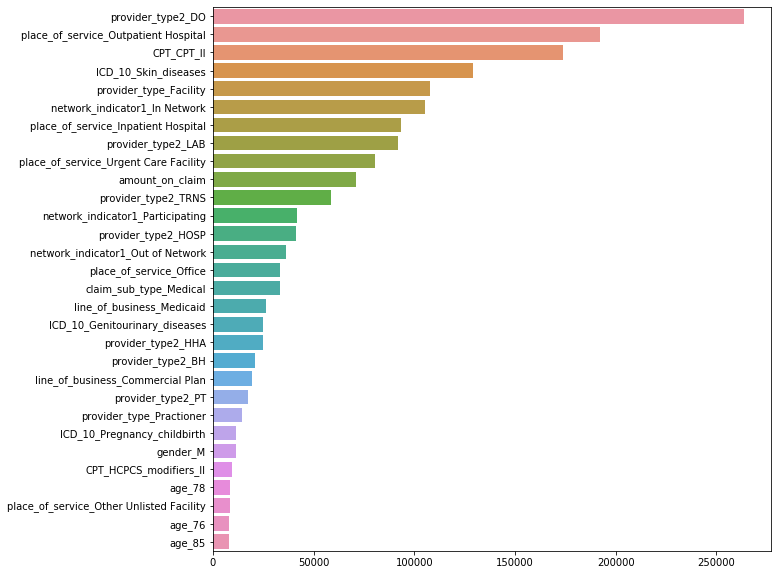

In [28]:
feature_importance ={i:j for i,j in zip(x_train.columns, np.round(fs.scores_,4))}
feature_importance = {i:j for i,j in sorted(feature_importance.items(),key=lambda x : x[1],reverse=True)}

top_features = list(feature_importance.keys())[:30]
top_features_importance = list(feature_importance.values())[:30]

plt.figure(figsize=(10,10))
sns.barplot(y = top_features,x = top_features_importance)

# Model Biulding

## Mdel-1 Random Forest

In [35]:
classifier.predict(x_test)

array(['Fully Paid', 'Partially Denied', 'Fully Denied', ...,
       'Partially Denied', 'Partially Denied', 'Fully Denied'],
      dtype=object)

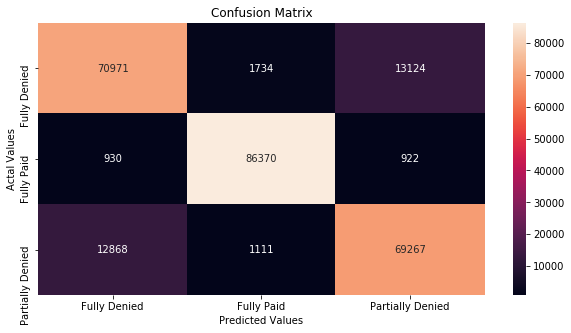

                  precision    recall  f1-score   support

    Fully Denied       0.84      0.83      0.83     85829
      Fully Paid       0.97      0.98      0.97     88222
Partially Denied       0.83      0.83      0.83     83246

        accuracy                           0.88    257297
       macro avg       0.88      0.88      0.88    257297
    weighted avg       0.88      0.88      0.88    257297



In [29]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

y_predict_test = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_predict_test,labels=['Fully Denied', 'Fully Paid', 'Partially Denied'])
cm_df = pd.DataFrame(cm,
                     index = ['Fully Denied', 'Fully Paid', 'Partially Denied'], 
                     columns = ['Fully Denied', 'Fully Paid', 'Partially Denied'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

cr = classification_report(y_test,y_predict_test,labels=['Fully Denied', 'Fully Paid', 'Partially Denied'])
print(cr)

In [55]:
feature_importance ={i:j for i,j in zip(x_train.columns, np.round(classifier.feature_importances_,4))}
feature_importance = {i:j for i,j in sorted(feature_importance.items(),key=lambda x : x[1],reverse=True)}

In [78]:
top_features = list(feature_importance.keys())[:30]
top_features_importance = list(feature_importance.values())[:30]

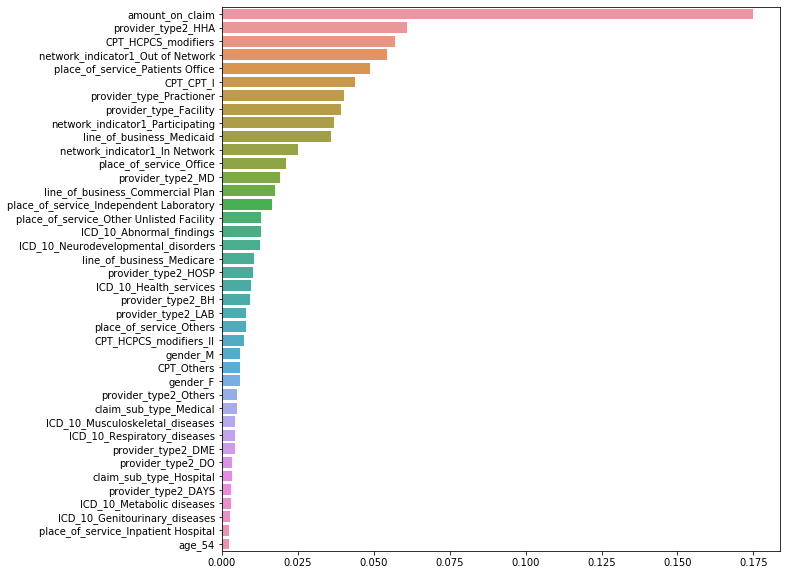

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(y = top_features,x = top_features_importance)

In [31]:
x_train.columns

(170,)

## Model-2 XGBoost

In [11]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

max_depth_ = 15
n_estimators = 150

xgclassifier=XGBClassifier(max_depth=max_depth_,n_estimators=n_estimators)
xgclassifier.fit(x_train, y_train)

C:\Users\pavan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


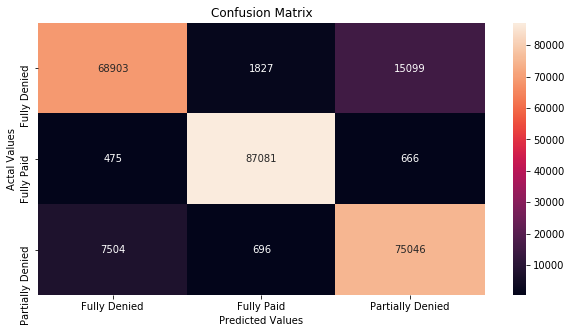

                  precision    recall  f1-score   support

    Fully Denied       0.90      0.80      0.85     85829
      Fully Paid       0.97      0.99      0.98     88222
Partially Denied       0.83      0.90      0.86     83246

        accuracy                           0.90    257297
       macro avg       0.90      0.90      0.90    257297
    weighted avg       0.90      0.90      0.90    257297



In [25]:
y_test_pred= xglassifier.predict_proba(x_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
y_test_pred = label_encoder.inverse_transform(y_test_pred)

cm = confusion_matrix(y_test,y_test_pred,labels=['Fully Denied', 'Fully Paid', 'Partially Denied'])
cm_df = pd.DataFrame(cm,
                     index = ['Fully Denied', 'Fully Paid', 'Partially Denied'], 
                     columns = ['Fully Denied', 'Fully Paid', 'Partially Denied'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

cr = classification_report(y_test,y_test_pred,labels=['Fully Denied', 'Fully Paid', 'Partially Denied'])
print(cr)

In [ ]:
top_20_positive_features_bow=np.take(features_list_bow,nbclassifier1.feature_log_prob_[1,:].argsort()[-1:-21:-1])

## Model-2 XGBoost

In [8]:
from tqdm import tqdm
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import numpy as np

model = LGBMClassifier(class_weight='balanced')

max_depth = [3,5,10,12,15]
n_estimators=[20,50,100,150,200]

params = {'max_depth':max_depth,'n_estimators':n_estimators}

classifier = GridSearchCV(model,params,cv=5,verbose=1,scoring='f1_micro',return_train_score=True)

search = classifier.fit(x_train, y_train)

search.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 30.6min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


{'max_depth': 15, 'n_estimators': 200}

In [9]:
search.cv_results_

{'mean_fit_time': array([ 3.36659346,  3.95363526,  5.1924201 ,  6.43523917,  7.59626341,
         3.86874061,  5.24170647,  6.71165643,  8.08369179,  9.62870097,
         3.75526161,  5.47434778,  7.19404454,  8.8469038 , 10.0162776 ,
         3.71483736,  5.31178851,  7.30635443,  9.28774633, 10.66643567,
         3.77071466,  5.41107478,  8.19213419, 11.95407934, 11.70031853]),
 'std_fit_time': array([0.11991815, 0.05006049, 0.08692575, 0.1854633 , 0.10798377,
        0.30623911, 0.55584728, 0.34467747, 0.18030514, 0.2936406 ,
        0.0992666 , 0.1744345 , 0.07259374, 0.21524052, 0.21185571,
        0.09129169, 0.08621831, 0.19865942, 0.54682286, 0.79061558,
        0.0986012 , 0.20745585, 1.07908251, 1.57926421, 0.60950944]),
 'mean_score_time': array([1.10464916, 1.16198764, 1.30234289, 1.47652173, 1.6077353 ,
        1.23174758, 1.27561164, 1.48471961, 1.71436443, 1.90922046,
        1.1301208 , 1.31805639, 1.53433018, 1.74741974, 1.89917774,
        1.12382011, 1.2801055 , 1.5

In [76]:
import seaborn as sns

In [96]:
train_auc1 = search.cv_results_['mean_train_score']
cv_auc1 = search.cv_results_['mean_test_score']

In [102]:
train_li=np.zeros((len(max_depth),len(n_estimators)))
cv_li=np.zeros((len(max_depth),len(n_estimators)))

In [120]:
for i in range(len(max_depth)):
    for j in range(len(n_estimators)):
        train_li[i][j]=train_auc1[j+len(n_estimators)*i]
        cv_li[i][j]=cv_auc1[j+len(n_estimators)*i] 
train_auc1_data = pd.DataFrame(train_li,columns=n_estimators,index=max_depth)
cv_auc1_data = pd.DataFrame(cv_li,columns=n_estimators,index=max_depth)

In [121]:
cv_auc1_data

,20,50,100,150,200
3,0.660555,0.684937,0.702452,0.710658,0.715518
5,0.676880,0.698844,0.711543,0.716007,0.718186
10,0.691823,0.712852,0.720430,0.720544,0.719705
12,0.695018,0.715739,0.723103,0.723341,0.722678
15,0.695340,0.717173,0.723237,0.723639,0.722247


Text(33.0, 0.5, 'max_depth')

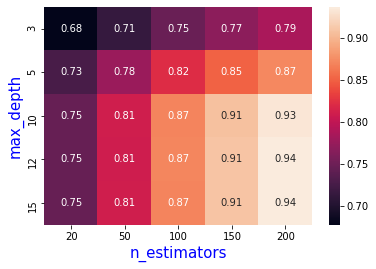

In [106]:
sns.heatmap(train_auc1_data,annot=True)
plt.xlabel('n_estimators',color='blue',size=15)
plt.ylabel('max_depth',color='blue',size=15)

Text(33.0, 0.5, 'max_depth')

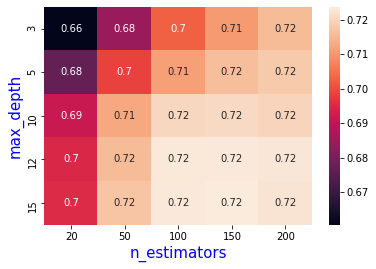

In [122]:
sns.heatmap(cv_auc1_data,annot=True)
plt.xlabel('n_estimators',color='blue',size=15)
plt.ylabel('max_depth',color='blue',size=15)

<h4> 1.5.1.b  Training using best hyper parameters and  Plot between FPR and TPR</h4>

In [2]:
from xgboost import XGBClassifier

In [11]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
# Best parameters
max_depth_ = 15
n_estimators = 150

lgbmclassifier=XGBClassifier(max_depth=max_depth_,n_estimators=n_estimators)
lgbmclassifier.fit(x_train, y_train)

y_train_pred = lgbmclassifier.predict_proba(x_train)   
y_test_pred= lgbmclassifier.predict_proba(x_test)

C:\Users\pavan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

cr = classification_report(y_test,y_predict_test,labels=['Fully Denied', 'Fully Paid', 'Partially Denied'])
print(cr)

In [108]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [109]:
print("="*100)
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
best_t1 = find_best_threshold(thresholds_tr1, fpr_tr1, tpr_tr1)
print("Train confusion matrix")
pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred1[:,1], best_t1)),index=['Actual Negative Class','Actual Positive Class'],columns=['Predicted Negative Class','Predicted Positive Class'])


the maximum value of tpr*(1-fpr) 0.6529114473699247 for threshold 0.818
Train confusion matrix


,Predicted Negative Class,Predicted Positive Class
Actual Negative Class,8869,2214
Actual Positive Class,11435,50678


In [129]:
print("="*100)
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
best_t1 = find_best_threshold(thresholds_te1, fpr_te1, tpr_te1)
print("Test confusion matrix")
pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred1[:,1], best_t1)),index=['Actual Negative Class','Actual Positive Class'],columns=['Predicted Negative Class','Predicted Positive Class'])


the maximum value of tpr*(1-fpr) 0.43338472014381035 for threshold 0.856
Test confusion matrix


,Predicted Negative Class,Predicted Positive Class
Actual Negative Class,3669,1790
Actual Positive Class,10866,19727
